In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set()
plt.style.use('ggplot') 

In [2]:
os.listdir('/kaggle/input/breast-cancer-dataset')  

['breast-cancer.csv']

# Read Data 

In [3]:
ca = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv') 

# Check Data 

In [4]:
ca.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
ca.isnull().sum() 

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
ca.sample(10) 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
373,901288,M,20.64,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.089410,...,25.370,23.17,166.80,1946.0,0.1562,0.30550,0.415900,0.211200,0.2689,0.07055
254,886226,M,19.45,19.33,126.50,1169.0,0.10350,0.11880,0.13790,0.085910,...,25.700,24.57,163.10,1972.0,0.1497,0.31610,0.431700,0.199900,0.3379,0.08950
542,921644,B,14.74,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.030270,...,16.510,32.29,107.40,826.4,0.1060,0.13760,0.161100,0.109500,0.2722,0.06956
449,911157302,M,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.115500,...,25.680,32.07,168.20,2022.0,0.1368,0.31010,0.439900,0.228000,0.2268,0.07425
395,903811,B,14.06,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.032510,...,14.920,25.34,96.42,684.5,0.1066,0.12310,0.084600,0.079110,0.2523,0.06609
116,864726,B,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.023080,...,9.414,17.07,63.34,270.0,0.1179,0.18790,0.154400,0.038460,0.1652,0.07722
347,89869,B,14.76,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.035280,...,17.270,17.93,114.20,880.8,0.1220,0.20090,0.215100,0.125100,0.3109,0.08187
250,884948,M,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.131000,...,25.580,27.00,165.30,2010.0,0.1211,0.31720,0.699100,0.210500,0.3126,0.07849
285,8912521,B,12.58,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,...,13.500,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
22,8511133,M,15.34,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.097560,...,18.070,19.08,125.10,980.9,0.1390,0.59540,0.630500,0.239300,0.4667,0.09946


In [7]:
diagnosis_counts = ca['diagnosis'].value_counts() 
diagnosis_counts

diagnosis
B    357
M    212
Name: count, dtype: int64

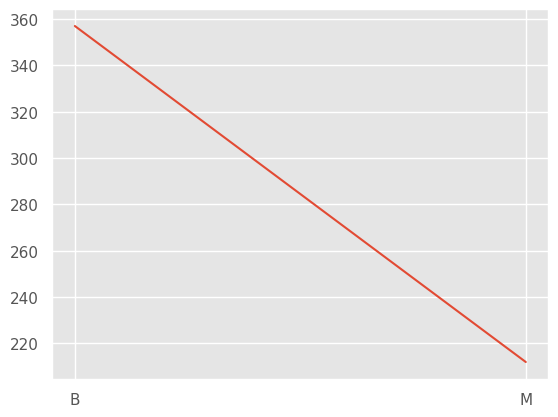

In [8]:
plt.plot(diagnosis_counts.index, diagnosis_counts) 

# Correlation: 

In [9]:
ca['diagnosis'] = ca['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)  

Text(0.5, 1.0, 'Diagnosis(M=1, B=0)')

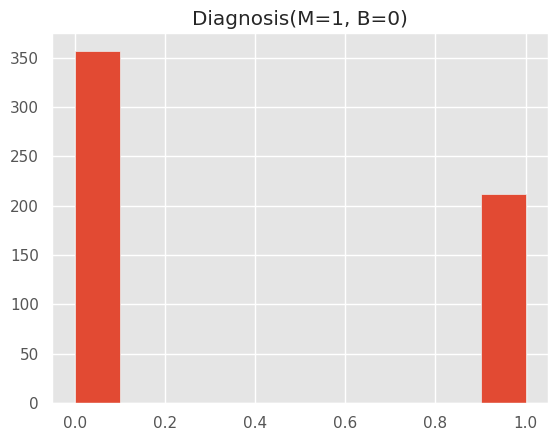

In [10]:
plt.hist(ca['diagnosis'])  

plt.title('Diagnosis(M=1, B=0)') 